In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

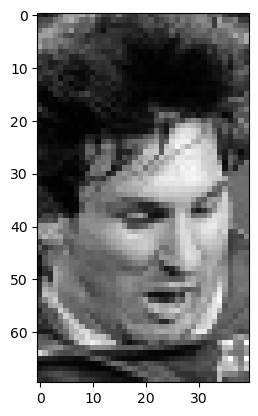

In [2]:
img = cv.imread('../samples/messi5.jpg')

template = img[70:140, 220:260]
template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

plt.imshow(template, cmap='gray')

In [3]:
img = cv.imread('../samples/messi5.jpg', 0)

# row by col
template = img[70:140, 220:260]

res = cv.matchTemplate(img, template, cv.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

res, min_loc, max_loc

(array([[ 809374.75 ,  803825.7  ,  822877.4  , ..., -149730.69 ,
         -132930.73 ,  -97983.4  ],
        [ 858426.6  ,  844203.6  ,  853930.3  , ..., -181542.66 ,
         -160547.06 , -120265.625],
        [ 880985.8  ,  858591.44 ,  861605.4  , ..., -216476.67 ,
         -190767.05 , -144281.   ],
        ...,
        [ 321710.84 ,  331377.66 ,  321330.34 , ...,  382028.   ,
          347882.75 ,  324800.22 ],
        [ 357793.34 ,  364815.03 ,  350345.75 , ...,  311747.66 ,
          301092.88 ,  283174.2  ],
        [ 381911.47 ,  383230.47 ,  375355.9  , ...,  171504.81 ,
          171931.53 ,  171337.44 ]], dtype=float32),
 (100, 201),
 (220, 70))

In [ ]:
h, w = template.shape

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for method in methods:
    img2 = img.copy()
    method = eval(method)
    res = cv.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img2, top_left, bottom_right, 255, 2)

    plt.figure()
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img2, cmap='gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(method)

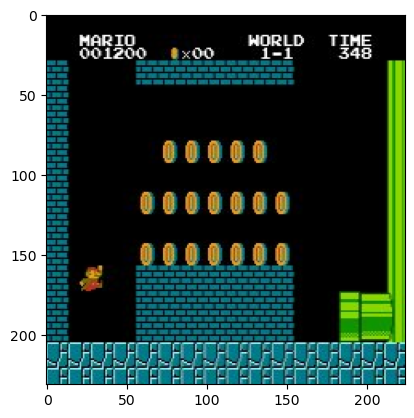

In [5]:
img = cv.imread('./mario.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
template = cv.imread('./coin.png', 0)
plt.imshow(img)

# cv.TM_CCOEFF_NORMED
# threshold = 0.8

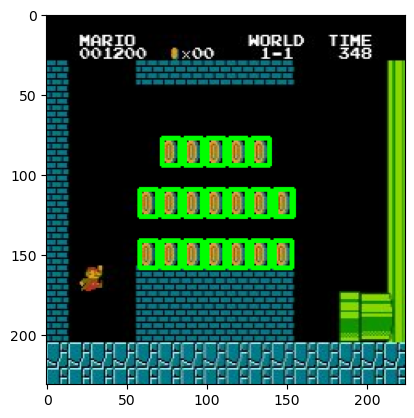

In [16]:
img = cv.imread('./mario.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
template = cv.imread('./coin.png', 0)

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

w, h = template.shape[::-1]

method = eval('cv.TM_CCOEFF_NORMED')

res = cv.matchTemplate(img_gray, template, method)
threshold = 0.8

loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)
    
plt.imshow(img)